In [6]:
#MakeMore is a character level language model
from collections import defaultdict

In [2]:
words = open('names.txt','r').read().splitlines()
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

**Starting with a Bigram Model, in a Bigram language model we are working with only 2 characters at a time.** \
Isabella - how likely a word is to start with I, how likely s would come after I and so on, thats how a language model would work on a character level.

In [19]:
b = defaultdict(int);
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1, ch2);
        b[bigram] = b[bigram] + 1;

In a Bigram Model, we can just keep a count

In [21]:
sorted(b.items(), key = lambda a: -a[1])


[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

Converting this information into a 2 dimentional array. The row of the array tells the information about the first character, the column of the array tells us the second character. The entry value is the number of times this has happened.

In [22]:
import torch

In [52]:
characters = sorted(list(set("".join(words))))
mapping = {c:i+1 for i,c in enumerate(characters)}
mapping['.'] = 0
revMapping = {a[1]: a[0] for a in mapping.items()}

In [46]:
N = torch.zeros(27,27, dtype = torch.int32)

In [53]:
for w in words:
    chs = ['.']+list(w)+ ['.'];
    for ch1, ch2 in zip(chs, chs[1:]):
        N[mapping[ch1]][mapping[ch2]] +=1;
N

tensor([[    0,  8820,  2612,  3084,  3380,  3062,   834,  1338,  1748,  1182,
          4844,  5926,  3144,  5076,  2292,   788,  1030,   184,  3278,  4110,
          2616,   156,   752,   614,   268,  1070,  1858],
        [13280,  1112,  1082,   940,  2084,  1384,   268,   336,  4664,  3300,
           350,  1136,  5056,  3268, 10876,   126,   164,   120,  6528,  2236,
          1374,   762,  1668,   322,   364,  4100,   870],
        [  228,   642,    76,     2,   130,  1310,     0,     0,    82,   434,
             2,     0,   206,     0,     8,   210,     0,     0,  1684,    16,
             4,    90,     0,     0,     0,   166,     0],
        [  194,  1630,     0,    84,     2,  1102,     0,     4,  1328,   542,
             6,   632,   232,     0,     0,   760,     2,    22,   152,    10,
            70,    70,     0,     0,     6,   208,     8],
        [ 1032,  2606,     2,     6,   298,  2566,    10,    50,   236,  1348,
            18,     6,   120,    60,    62,   756,   

In [40]:
import matplotlib.pyplot as plt
%matplotlib.inline

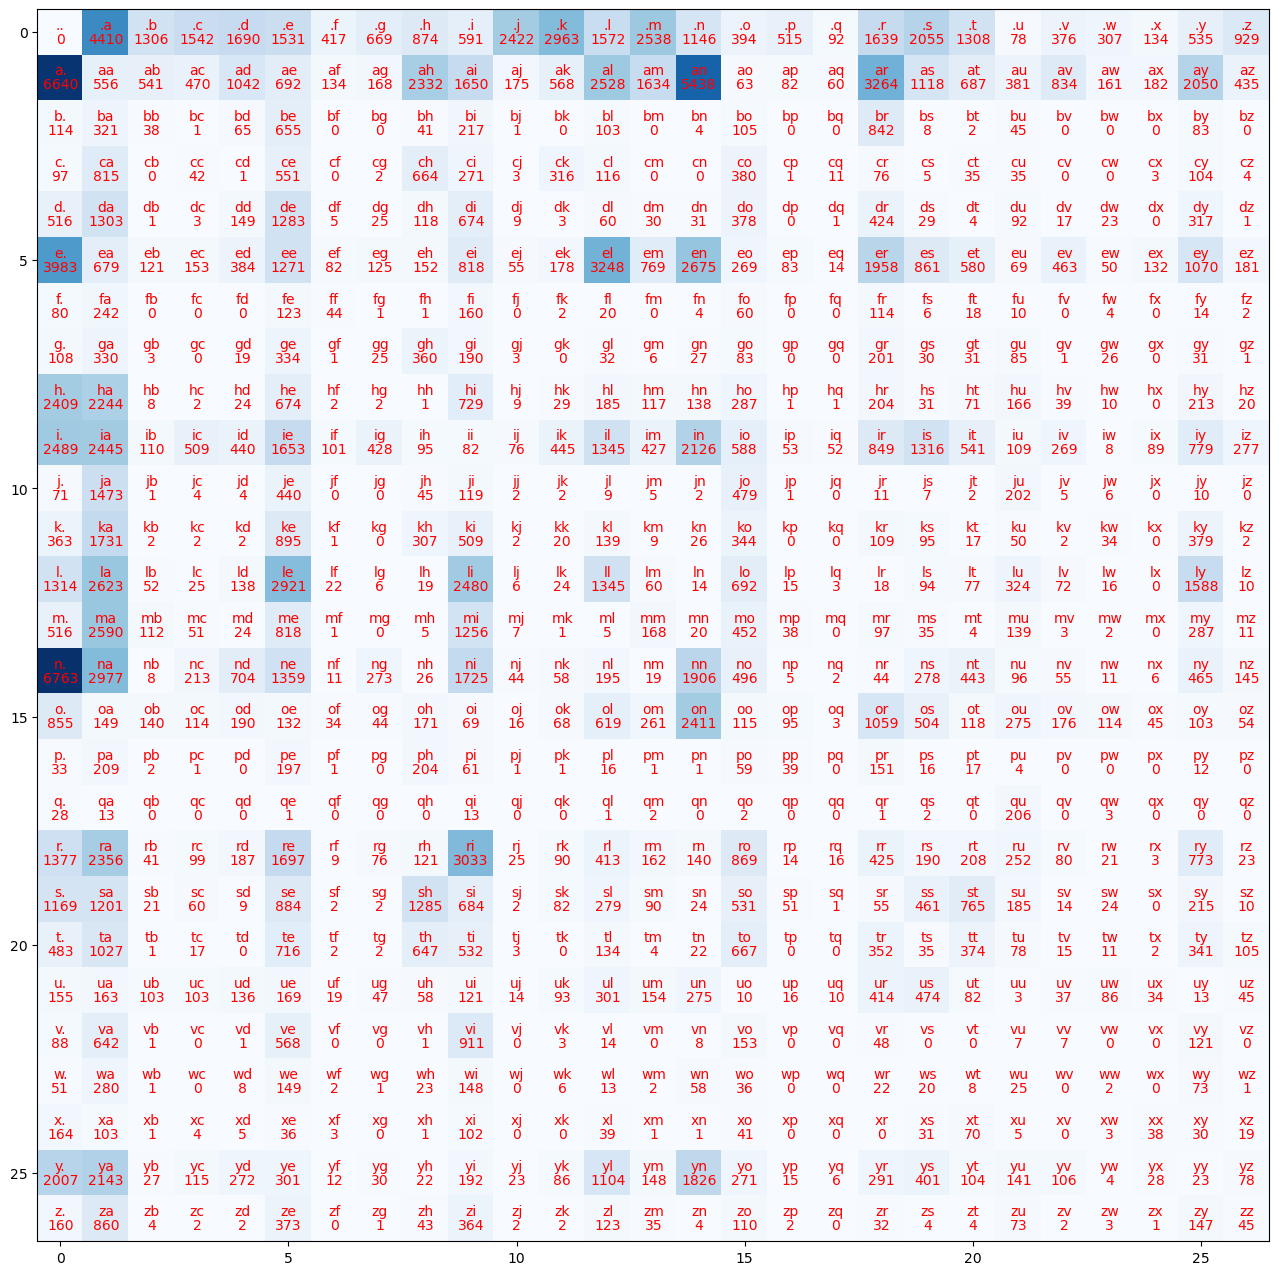

In [50]:
plt.figure(figsize = (16,16))
plt.imshow(N,cmap = 'Blues')
for i in range(27):
    for j in range(27):
        chstr = revMapping[i] + revMapping[j];
        plt.text(j,i,chstr,ha="center",va="bottom", color="red")
        plt.text(j,i,N[i,j].item(),ha="center",va="top", color="red")